In [ ]:
# !pip install scikit-learn

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip3 install pandas-datareader

In [ ]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader


In [ ]:
# url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
# !curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
# url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py39hd257fcd_4.tar.bz2'
# !curl -L $url | tar xj -C /usr/local/lib/python3.9/dist-packages/ lib/python3.9/site-packages/talib --strip-components=3
# import talib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as web

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import statistics
#import talib as ta

In [ ]:
#!pip install ta-lib

In [ ]:
#pip install --upgrade pip setuptools wheel


In [ ]:
# !brew install ta-lib
# !pip install wheel
# !pip install TA-Lib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/project_train.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-19,550.450012,553.400024,545.549988,551.474976,441.025330,1767416.0
1,2012-04-20,546.625000,553.974976,538.700012,544.224976,435.227417,2450024.0
2,2012-04-23,546.974976,551.200012,523.825012,532.125000,425.550781,2843868.0
3,2012-04-24,561.000000,602.500000,558.650024,597.099976,477.512512,18113782.0
4,2012-04-25,594.500000,595.000000,583.750000,585.525024,468.255798,5417898.0
...,...,...,...,...,...,...,...
2214,2021-04-09,3354.000000,3354.350098,3308.000000,3322.250000,3183.309814,2911129.0
2215,2021-04-12,3322.250000,3338.100098,3213.199951,3246.550049,3110.776367,3791828.0
2216,2021-04-13,3214.000000,3214.000000,3073.050049,3104.050049,2974.235352,8654596.0
2217,2021-04-15,3160.300049,3237.250000,3087.449951,3218.949951,3084.330078,6062760.0


In [ ]:
d=pd.DataFrame(data)

high_low=d["High"]-d["Low"]
open_close=d["Open"]-d["Close"]
Seven_MA=d["Close"].to_frame()
Fourteen_DMA=d["Close"].to_frame()
Twentyone_DMA=d["Close"].to_frame()
STD7=d["Close"].to_frame()

d["High_low"]=high_low

d["Open_Close"]=open_close

d["Seven_MA"]=d["Close"].rolling(7).mean()
d.dropna(inplace=True)

d["Fourteen_DMA"]=d["Close"].rolling(14).mean()
d.dropna(inplace=True)

d["TwentyOne_DMA"]=d["Close"].rolling(21).mean()
d.dropna(inplace=True)

d["STD7"]=d["Close"].std()
d.dropna(inplace=True)

d

,Date,Open,High,Low,Close,Adj Close,Volume,High_low,Open_Close,Seven_MA,Fourteen_DMA,TwentyOne_DMA,STD7
39,2012-06-14,624.500000,630.750000,622.500000,627.000000,504.650848,1471124.0,8.250000,-2.500000,622.021432,618.699999,615.640477,597.051461
40,2012-06-15,627.025024,640.000000,624.500000,636.224976,512.075928,1986040.0,15.500000,-9.199952,623.542855,620.405356,616.841666,597.051461
41,2012-06-18,638.000000,643.174988,625.000000,628.575012,505.918701,1495388.0,18.174988,9.424988,624.753575,621.005358,617.948809,597.051461
42,2012-06-19,628.450012,639.625000,627.549988,636.974976,512.679626,1769058.0,12.075012,-8.524964,627.828570,622.198212,619.490476,597.051461
43,2012-06-20,637.000000,637.000000,621.650024,626.400024,504.167847,1753740.0,15.349976,10.599976,629.203570,622.464286,620.174999,597.051461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,2021-04-09,3354.000000,3354.350098,3308.000000,3322.250000,3183.309814,2911129.0,46.350098,31.750000,3251.064279,3177.942871,3142.699998,597.051461
2215,2021-04-12,3322.250000,3338.100098,3213.199951,3246.550049,3110.776367,3791828.0,124.900147,75.699951,3260.878557,3191.967878,3152.014288,597.051461
2216,2021-04-13,3214.000000,3214.000000,3073.050049,3104.050049,2974.235352,8654596.0,140.949951,109.949951,3252.171422,3190.139317,3153.590483,597.051461
2217,2021-04-15,3160.300049,3237.250000,3087.449951,3218.949951,3084.330078,6062760.0,149.800049,-58.649902,3249.321429,3195.592878,3161.257150,597.051461


In [ ]:
# dataset_train = pd.read_excel('d.xlsx')
dataset_train=d
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_low,Open_Close,Seven_MA,Fourteen_DMA,TwentyOne_DMA,STD7
39,2012-06-14,624.500000,630.750000,622.500000,627.000000,504.650848,1471124.0,8.250000,-2.500000,622.021432,618.699999,615.640477,597.051461
40,2012-06-15,627.025024,640.000000,624.500000,636.224976,512.075928,1986040.0,15.500000,-9.199952,623.542855,620.405356,616.841666,597.051461
41,2012-06-18,638.000000,643.174988,625.000000,628.575012,505.918701,1495388.0,18.174988,9.424988,624.753575,621.005358,617.948809,597.051461
42,2012-06-19,628.450012,639.625000,627.549988,636.974976,512.679626,1769058.0,12.075012,-8.524964,627.828570,622.198212,619.490476,597.051461
43,2012-06-20,637.000000,637.000000,621.650024,626.400024,504.167847,1753740.0,15.349976,10.599976,629.203570,622.464286,620.174999,597.051461


In [ ]:
#Prepare Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset_train['Close'].values.reshape(-1,1))

prediction_days = 60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=5)) #prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

'''Test the model accuracy on existing data'''



Epoch 1/25
66/66 [==============================] - 20s 116ms/step - loss: 0.0229
Epoch 2/25
66/66 [==============================] - 7s 100ms/step - loss: 0.0047
Epoch 3/25
66/66 [==============================] - 8s 114ms/step - loss: 0.0039
Epoch 4/25
66/66 [==============================] - 7s 103ms/step - loss: 0.0037
Epoch 5/25
66/66 [==============================] - 7s 111ms/step - loss: 0.0033
Epoch 6/25
66/66 [==============================] - 7s 107ms/step - loss: 0.0029
Epoch 7/25
66/66 [==============================] - 7s 107ms/step - loss: 0.0028
Epoch 8/25
66/66 [==============================] - 8s 119ms/step - loss: 0.0026
Epoch 9/25
66/66 [==============================] - 7s 113ms/step - loss: 0.0023
Epoch 10/25
66/66 [==============================] - 8s 119ms/step - loss: 0.0021
Epoch 11/25
66/66 [==============================] - 8s 119ms/step - loss: 0.0020
Epoch 12/25
66/66 [==============================] - 7s 98ms/step - loss: 0.0019
Epoch 13/25
66/66 [======

'Test the model accuracy on existing data'

In [ ]:
#Load Test Data
test_start=dt.datetime(2022, 2, 7)
test_end=dt.datetime.now()

test_data =  pd.read_csv('/content/drive/MyDrive/project_test.csv')
actual_prices=test_data['Close'].values

total_dataset=pd.concat((dataset_train['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
test_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
490,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779
491,2023-04-12,3227.949951,3260.949951,3199.000000,3241.649902,3241.649902,2417727
492,2023-04-13,3210.000000,3230.000000,3180.000000,3188.850098,3188.850098,4174070
493,2023-04-17,3134.100098,3163.399902,3070.250000,3139.500000,3139.500000,5505048
494,2023-04-18,3154.949951,3156.850098,3110.600098,3130.750000,3130.750000,2617302


16/16 [==============================] - 2s 27ms/step


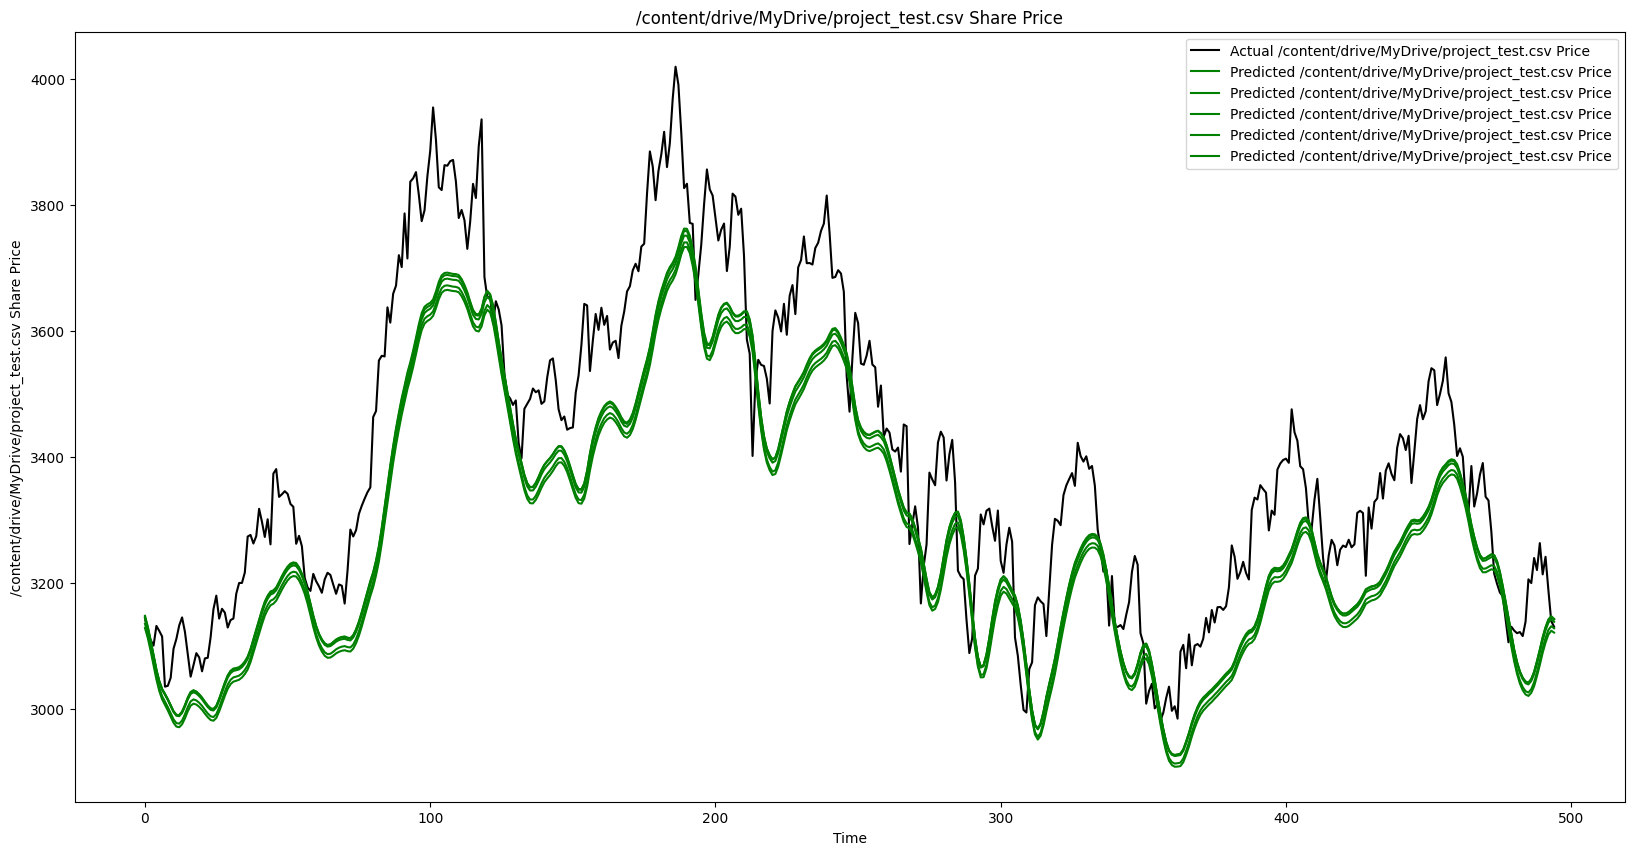

In [ ]:
# Make Predictions on Test Data
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "black", label=f"Actual {'/content/drive/MyDrive/project_test.csv'} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {'/content/drive/MyDrive/project_test.csv'} Price")
plt.title(f"{'/content/drive/MyDrive/project_test.csv'} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{'/content/drive/MyDrive/project_test.csv'} Share Price")
plt.legend()
plt.show()





In [ ]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


In [ ]:
prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("PREDICTION OF STOCK PRICE ON 19th April 2023")
print(f"Prediction: {prediction}")

1/1 [==============================] - 0s 33ms/step
PREDICTION OF STOCK PRICE ON 19th April 2022
Prediction: [[3110.523  3130.921  3126.6304 3116.8499 3129.8992]]


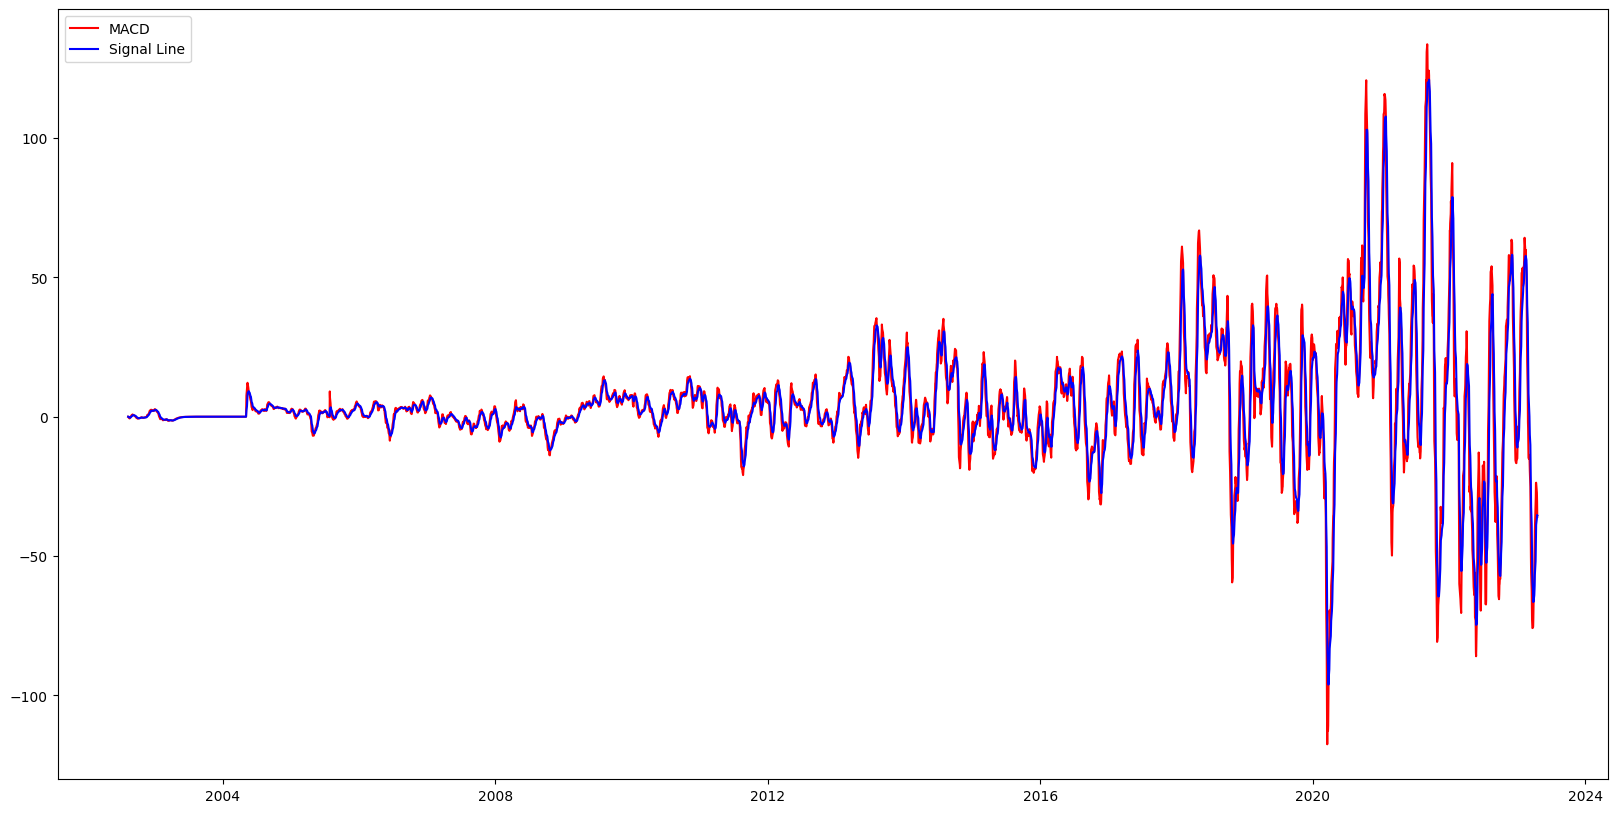

In [ ]:
import pandas as pd
import yfinance as yf
# Get historical data for a stock using yahoo finance
stock = yf.Ticker("TCS.NS")
data = stock.history(period="max")
# Calculate 12-day and 26-day EMA
ema_12 = data["Close"].ewm(span=12, adjust=False).mean()
ema_26 = data["Close"].ewm(span=26, adjust=False).mean()
# Calculate MACD
macd = ema_12 - ema_26
# Calculate signal line
signal = macd.ewm(span=9, adjust=False).mean()
# Plot MACD and signal line
import matplotlib.pyplot as plt
plt.plot(macd, label='MACD', color='red')
plt.plot(signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()

The graph shows two lines: the MACD line and the signal line.

The MACD line is the difference between the 12-day and 26-day exponential moving averages (EMA) of the stock's closing price. When the MACD line is above the signal line, it indicates that the stock is likely in an uptrend. Conversely, when the MACD line is below the signal line, it indicates that the stock is likely in a downtrend.

The signal line is a 9-day EMA of the MACD line. It is used to generate trading signals. When the MACD line crosses above the signal line, it is considered a bullish signal, indicating that it may be a good time to buy the stock. When the MACD line crosses below the signal line, it is considered a bearish signal, indicating that it may be a good time to sell the stock.

In the above code, the MACD and signal line are plotted over time. The x-axis represents time (in this case, the date range for which we have historical data), and the y-axis represents the value of the MACD and signal line. When the MACD line crosses the signal line, it generates a trading signal, as described above.

Overall, the MACD indicator is useful for identifying changes in a stock's trend, as well as potential buying and selling opportunities. However, it should be used in conjunction with other technical and fundamental indicators to make informed investment decisions.

# TATA STEEL STOCK PREDICTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Tatasteel.train.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-19,44.459454,44.745277,43.973560,44.507092,15.566110,29199181.0
1,2012-04-20,44.359417,45.207352,44.211742,44.807205,15.671069,40414956.0
2,2012-04-23,44.778622,45.664665,43.792538,44.097416,15.422827,50229389.0
3,2012-04-24,44.206982,45.097790,43.835411,44.802441,15.669404,24618891.0
4,2012-04-25,44.969170,45.278809,43.759193,44.349892,15.511128,32090693.0


In [ ]:
d1=pd.DataFrame(data)

high_low=d1["High"]-d1["Low"]
open_close=d1["Open"]-d1["Close"]
Seven_MA=d1["Close"].to_frame()
Fourteen_DMA=d1["Close"].to_frame()
Twentyone_DMA=d1["Close"].to_frame()
STD7=d1["Close"].to_frame()

d1["High_low"]=high_low

d1["Open_Close"]=open_close

d1["Seven_MA"]=d1["Close"].rolling(7).mean()
d1.dropna(inplace=True)

d1["Fourteen_DMA"]=d1["Close"].rolling(14).mean()
d1.dropna(inplace=True)

d1["TwentyOne_DMA"]=d1["Close"].rolling(21).mean()
d1.dropna(inplace=True)

d1["STD7"]=d["Close"].std()
d1.dropna(inplace=True)

d1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,High_low,Open_Close,Seven_MA,Fourteen_DMA,TwentyOne_DMA,STD7
2214,2021-04-09,92.099998,93.000000,88.570000,89.949997,39.108925,321790690.0,4.430000,2.150001,87.117857,80.776428,77.760000,597.051461
2215,2021-04-12,87.654999,89.320000,84.334999,85.154999,37.024132,221355040.0,4.985001,2.500000,87.685000,81.623214,78.449524,597.051461
2216,2021-04-13,86.199997,88.160004,84.900002,87.900002,38.217617,204285020.0,3.260002,-1.700005,87.912857,82.591071,79.185238,597.051461
2217,2021-04-15,89.199997,91.150002,87.949997,89.820000,39.052406,218563570.0,3.200005,-0.620003,88.347857,83.712857,80.034048,597.051461
2218,2021-04-16,90.379997,91.440002,88.625000,89.025002,38.706749,173985980.0,2.815002,1.354995,88.739285,85.051786,80.766667,597.051461


In [ ]:
dataset_train1=d1

In [ ]:
dataset_train1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_low,Open_Close,Seven_MA,Fourteen_DMA,TwentyOne_DMA,STD7
39,2012-06-14,39.252750,39.705299,38.681107,38.771618,13.560160,30293019.0,1.024192,0.481132,39.105755,38.890028,38.681334,597.051461
40,2012-06-15,38.881184,39.624317,38.795437,39.495697,13.813400,26602125.0,0.828880,-0.614513,39.167683,38.908403,38.720804,597.051461
41,2012-06-18,39.919666,40.510361,39.405186,39.991119,13.986670,56844796.0,1.105175,-0.071453,39.285414,38.935283,38.810634,597.051461
42,2012-06-19,40.110210,40.491306,39.567150,40.038757,14.003332,39621295.0,0.924156,0.071453,39.419478,39.002996,38.890028,597.051461
43,2012-06-20,40.386505,40.910511,40.119740,40.662800,14.221589,40682407.0,0.790771,-0.276295,39.649496,39.160538,39.014792,597.051461


In [ ]:
# dataset_train1 = pd.read_csv('/content/drive/MyDrive/TATASTEEL.NS (1).csv')
# dataset_train1.head()

In [ ]:
#Prepare Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset_train1['Close'].values.reshape(-1,1))

prediction_days = 60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=5)) #prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error',metrics='accuracy')
model.fit(x_train, y_train, epochs=25, batch_size=32)

'''Test the model accuracy on existing data'''

Epoch 1/25
66/66 [==============================] - 17s 158ms/step - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 2/25
66/66 [==============================] - 7s 112ms/step - loss: 0.0049 - accuracy: 4.7801e-04
Epoch 3/25
66/66 [==============================] - 8s 126ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 4/25
66/66 [==============================] - 6s 94ms/step - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 5/25
66/66 [==============================] - 8s 126ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 6/25
66/66 [==============================] - 6s 93ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 7/25
66/66 [==============================] - 8s 125ms/step - loss: 0.0029 - accuracy: 4.7801e-04
Epoch 8/25
66/66 [==============================] - 6s 95ms/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 9/25
66/66 [==============================] - 8s 124ms/step - loss: 0.0023 - accuracy: 9.5602e-04
Epoch 10/25
66/66 [==============================] - 6s 95ms/step 

'Test the model accuracy on existing data'

In [ ]:
#Load Test Data
test_start=dt.datetime(2020, 1, 1)
test_end=dt.datetime.now()

test_data =  pd.read_csv('/content/drive/MyDrive/tatasteel.test.csv')
actual_prices=test_data['Close'].values

total_dataset=pd.concat((dataset_train['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-20,90.000000,90.574997,88.199997,89.400002,38.869797,169152930
1,2021-04-22,89.995003,93.864998,89.705002,92.139999,40.061104,319028150
2,2021-04-23,92.980003,94.500000,91.074997,92.559998,40.243713,247523860
3,2021-04-26,93.500000,95.599998,93.004997,94.074997,40.902412,212348580
4,2021-04-27,94.830002,98.300003,94.430000,97.775002,42.511120,249045150


16/16 [==============================] - 0s 28ms/step


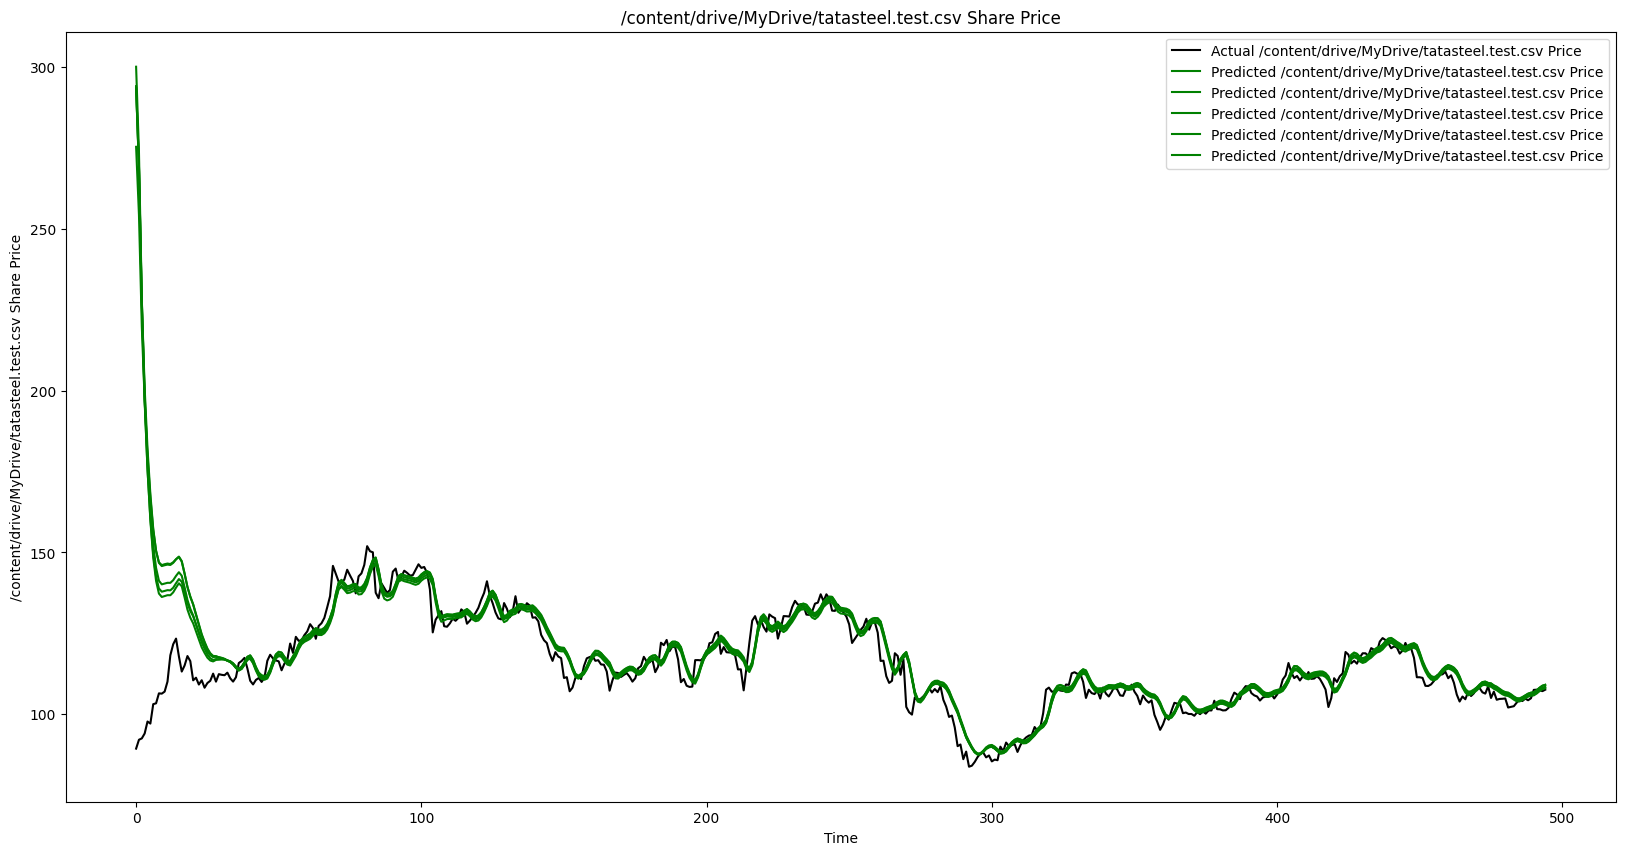

In [ ]:
# Make Predictions on Test Data
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "black", label=f"Actual {'/content/drive/MyDrive/tatasteel.test.csv'} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {'/content/drive/MyDrive/tatasteel.test.csv'} Price")
plt.title(f"{'/content/drive/MyDrive/tatasteel.test.csv'} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{'/content/drive/MyDrive/tatasteel.test.csv'} Share Price")
plt.legend()
plt.show()

In [ ]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


In [ ]:
prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("PREDICTION OF STOCK PRICE ON 19thApril 2023")
print(f"Prediction: {prediction}")

1/1 [==============================] - 0s 32ms/step
PREDICTION OF STOCK PRICE ON 19thApril 2023
Prediction: [[109.211815 108.06212  108.35058  109.15134  108.58567 ]]
